In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel


In [3]:
df_gp = pd.read_csv("./Data/gp_data.csv")

In [4]:
df_gp.head(5)

,x,y
0,-3.213717,15.410904
1,-2.583426,22.534045
2,-2.147617,4.547179
3,-1.634624,9.537378
4,-1.506149,8.213919


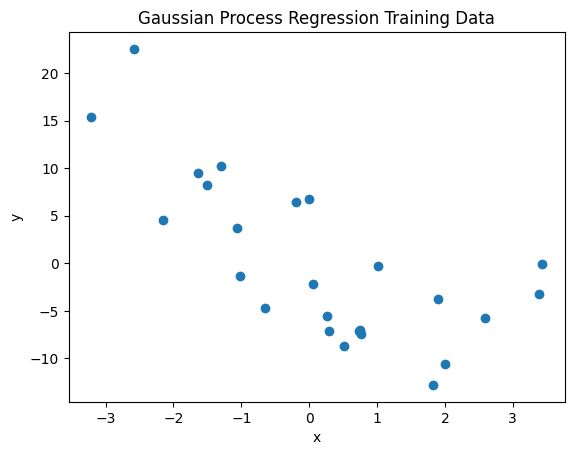

In [5]:
plt.scatter(df_gp['x'], df_gp['y'])
plt.title('Gaussian Process Regression Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
kernel = 1 * RBF(length_scale=1.0) + WhiteKernel(noise_level_bounds=(1.0, 20.0))

In [7]:
gaussian_process = GaussianProcessRegressor(kernel=kernel)

In [8]:
gaussian_process.fit(df_gp['x'].values.reshape(-1,1), df_gp['y'])

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1))

In [9]:
gaussian_process.kernel_

9.24**2 * RBF(length_scale=0.412) + WhiteKernel(noise_level=8.33)

In [10]:
x_predict = np.arange(df_gp['x'].min(), df_gp['x'].max(), 0.01).reshape(-1,1)

mean_prediction, std_prediction = gaussian_process.predict(x_predict, return_std=True)

In [11]:
y_true = [(-3.4 - 2.0*x + (x-1.0)**2 + 5.5*np.sin(5.0*x-4.0))[0] for x in x_predict]


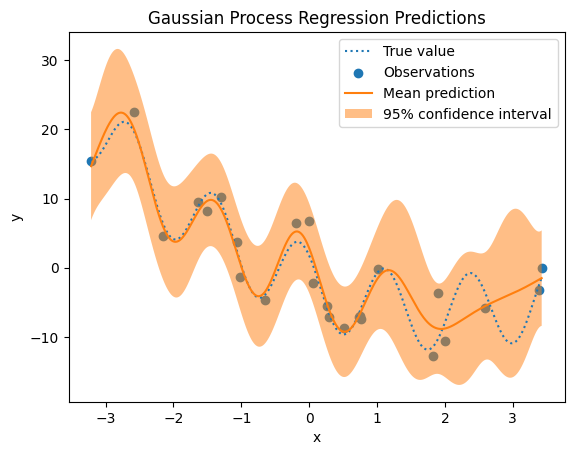

In [12]:
plt.plot(x_predict, y_true, label="True value", linestyle="dotted")
plt.scatter(df_gp['x'], df_gp['y'], label="Observations")
plt.plot(x_predict, mean_prediction, label="Mean prediction")
plt.fill_between(
    x_predict.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.title('Gaussian Process Regression Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()